# Zomato Restaurant Ratings Predection

### Problem Description

Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. 



### Problem Statement

The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place. So we will try to predict rating for particular restaurant.
We need to predict rating based on different parameters like Average_cost for two people, Online Order available, foods,menu list, most liked dishes etc features.

##### Data

https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

###### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Understanding the data

In [2]:
#copying data in csv file to dataframe
data =  pd.read_csv(r"C:\Users\Yogita\Desktop\projectipl\zomato.csv")

In [3]:
#displaying 1st 5 rows
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


**Columns details**
1.	**url(object)** – This is simply a string with tells the URL which is almost common for all as it is starting with Zomato.com/xyz/abc.
2.	**Address(object)** – Complete address of the restaurant. Contains the full address which is not required for the analysis, can be deleted.
3.	**Name(object)** – Name of the restaurant, The name is unique and is different languages such as Gabar(Hindi Word), Asha(Hindi word), Twist (Englih) – it will be difficult to categories 51,717 values in the ANme column. For these reasons the column can be dropped.
4.	**Online order(Object)** – Yes or No, useful for predicting by converting it to binary.
5.	**Book Table(Object)** – Restaurant provides online table booking service (yes or no), useful for predicting by converting it to binary.
6.	**Rate (Target)**– Overall rating of the restaurant between” 1 – 5” upto one decimal point example 4.2. “New” for new restaurants. 
7.	**Votes(int)** – Total number of reviews/votes, not useful for predicting the target variable, needs to be dropped.
8.	**Phone(object)** – Phone number of the restaurant. The counts of phone numbers provided could help in predicting target.
9.	**Location(object)** – Neighborhood of the Restaurant in Bengaluru, important for predicting rating. One- hot encode to change it to dummies.
10.	**Rest_type(object)** – Type of the restaurant, important for predicting rating. One- hot encode to change it to dummies.
11.	**Dish_liked(object)** – Dish liked by people in the restaurant,
12.	**Cuisines(object)** – Cuisines types in the re restaurants. Types are comma separated
13.	**Approx_cost(object)** – expected cost for meal of two in Rupees, important for prediction
14.	 **Reviews_list(object)** - list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer. Needs to be dropped for the prediction for new restaurant.
15.	**Menu_item(Object)** – List of menus available in restaurants. Contains more than 54% missing values, needs to be dropped. 
16.	**Listed_in(type)** -  type of meal
17.	**Listed_in(city)** - contains the neighborhood in which the restaurant is listed - duplicate column can be dropped


In [4]:
data.shape

(51717, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

**About Data set**
- Dataset size: 51,717 rows x 17 columns
- All columns are of type "object" except for votes
- 7775 ratings are missin in the rating column
- 1208 phone numbers are missing in the phone column
- 21 are mising location
- 28,078 dished liked are missing
- 45 cuisines are missing
- 346 approx cost for two persons is missing



In [6]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Observation:
 
 only votes column is of int type all other columns are of obj type
- Minimum vote's value is 0, can be interpret as there are some restaurants who have 0 vote
- Maximum vote's value is 16832, there is a restaurant who has 16832.
- Average vote's values is 284, so average 284 votes for restaurant


### Missing values

In [7]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Note:-
This says we have missing values in rate,phone,location,rest_type,dish_liked,cuisines,approx_cost
The Column that has the most number of missing values is the Dish Liked column

In [8]:
#removing rows which has nulls in cuisines
data=data[data.cuisines.isna()==False]

In [9]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

After Studying the data we can clearly delete the following columns as the make are not useful for our analysis "url", 'address','listed_in(type)','menu_item','reviews_list'

In [10]:
data.drop(columns=['url','address','menu_item','reviews_list','listed_in(type)'], inplace  =True)


In [11]:
# as new restaurants won't have any votes we will drop votes
data.drop(columns=['votes'], inplace  =True)

In [12]:
# check for duplicate values
print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   15055


In [13]:
# drop the duplicates
data.drop_duplicates(inplace=True)

print("No of Duplicates in dataset:  ",data.duplicated().sum())

No of Duplicates in dataset:   0


In [14]:
#Renaming the Approximate cost for two column for easier access
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)
data.rename(columns={'rate': 'rating'}, inplace=True)
data.rename(columns={'listed_in(city)': 'city'}, inplace=True)


In [15]:
data.head(2)

,name,online_order,book_table,rating,phone,location,rest_type,dish_liked,cuisines,average_cost,city
0,Jalsa,Yes,Yes,4.1/5,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari


## Preprocessing and visualizations

In [16]:
#storing the restaurants which are new in a dataframe
new_rest= data.loc[(data["rating"]=="NEW")]
new_rest

,name,online_order,book_table,rating,phone,location,rest_type,dish_liked,cuisines,average_cost,city
72,Spicy Tandoor,No,No,NEW,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,Banashankari
110,Hari Super Sandwich,No,No,NEW,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,Banashankari
130,Roll Magic Fast Food,No,No,NEW,+91 9731409204,Banashankari,"Takeaway, Delivery",NaN,"Biryani, Rolls, Chinese",200,Banashankari
131,Foodlieious Multi Cuisine,No,No,NEW,+91 9168753522\r\n+91 8217877100,Banashankari,Quick Bites,NaN,North Indian,100,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51146,Punjab Beat,Yes,Yes,NEW,080 71967671,Whitefield,Casual Dining,NaN,North Indian,700,Whitefield
51500,On The Go,No,No,NEW,+91 9972545294,Whitefield,Quick Bites,NaN,"North Indian, Mughlai, Chinese",400,Whitefield
51586,Quick Bites,Yes,No,NEW,+91 9742377087\n+91 7899303299,Whitefield,Quick Bites,NaN,Chinese,200,Whitefield
51604,Nawab Di Biryani,No,No,NEW,+91 7899298400\n+91 9818654628,Whitefield,"Takeaway, Delivery",NaN,"Biryani, Mughlai",400,Whitefield


In [17]:
#dropping the restaurants which are new or having - in rating
data['rating'] = data['rating'].replace('NEW',np.NaN)
data['rating'] = data['rating'].replace('-',np.NaN)


In [18]:
data['rating'].head(2)

0    4.1/5
1    4.1/5
Name: rating, dtype: object

In [19]:
#convert rating to string
data['rating'] = data['rating'].astype(str)
#removed all '/5' and replace with ''
data['rating'] = data['rating'].apply(lambda r: r.replace('/5',''))
## convert rating to float
data['rating'] = data['rating'].apply(lambda r: float(r))


In [20]:
#droping rows which has null in rating 
data.drop(data[data['rating'].isnull()].index, inplace = True)

In [21]:
data['rating'].isnull().sum()

0

In [22]:
data['rating'].head(2)

0    4.1
1    4.1
Name: rating, dtype: float64

Observation
- we can say that 'Cafe Coffee Day' day has highest count among all


###### Online orders

In [23]:
data.online_order.value_counts()

Yes    19566
No      9564
Name: online_order, dtype: int64

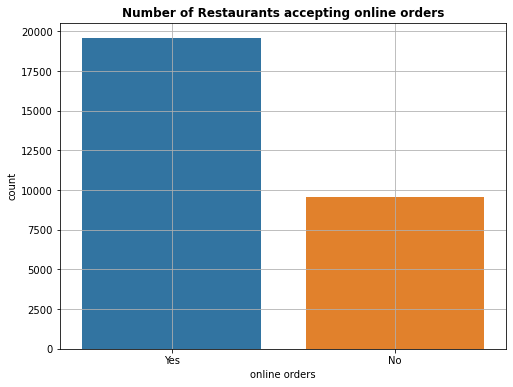

In [24]:
plt.figure(figsize = (8,6))
ax= sns.countplot(data['online_order'])
#sns.set_style('whitegrid')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.grid()

Observation:
- Most of order are onlines.
- no missing values in online order colomn

###### Book Table

In [25]:
data['book_table'].value_counts()

No     25621
Yes     3509
Name: book_table, dtype: int64

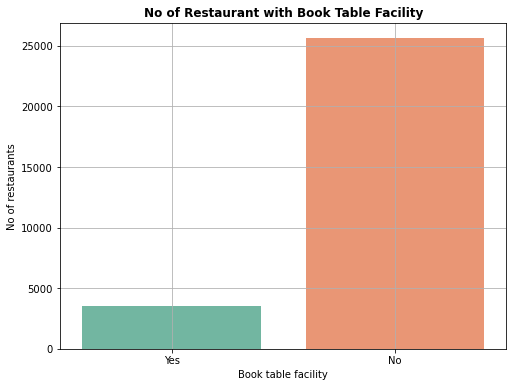

In [26]:
plt.figure(figsize=(8,6)) 
sns.countplot(data['book_table'], palette= "Set2")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold',color='k')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')
plt.grid()

Observation:
- Most of restaurant do not have book table facility
- no missing values in book_table colomn

###### Top 20 restaurant in the Banglore

In [27]:
data.name.value_counts()[:20]

Cafe Coffee Day              65
Five Star Chicken            59
Pizza Hut                    56
Kanti Sweets                 56
Domino's Pizza               55
Baskin Robbins               54
KFC                          53
Sweet Truth                  52
Just Bake                    52
Faasos                       51
Subway                       50
Empire Restaurant            50
Lassi Shop                   48
McDonald's                   46
Beijing Bites                46
Burger King                  46
Chai Point                   46
A2B - Adyar Ananda Bhavan    45
Chung Wah                    43
Polar Bear                   43
Name: name, dtype: int64

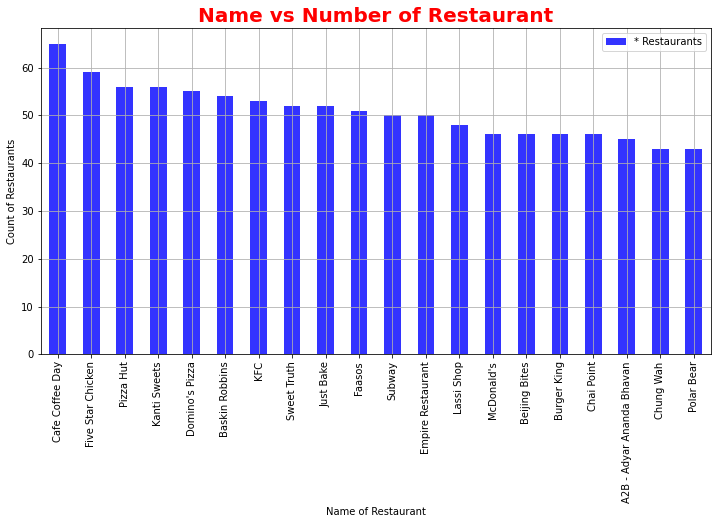

In [28]:
plt.figure(figsize = (12,6))
ax = data.name.value_counts()[:20].plot(kind = 'bar',color='b',alpha=0.8)
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold',color='r')
plt.grid()

###### Top 10 locations having maximum number of restaurants

In [29]:
#Location
data['city'].value_counts()[:10]

Koramangala 4th Block    2080
BTM                      2032
Jayanagar                1772
Koramangala 6th Block    1634
Koramangala 7th Block    1575
Koramangala 5th Block    1464
JP Nagar                 1176
Brigade Road             1029
Church Street            1012
Kammanahalli              949
Name: city, dtype: int64

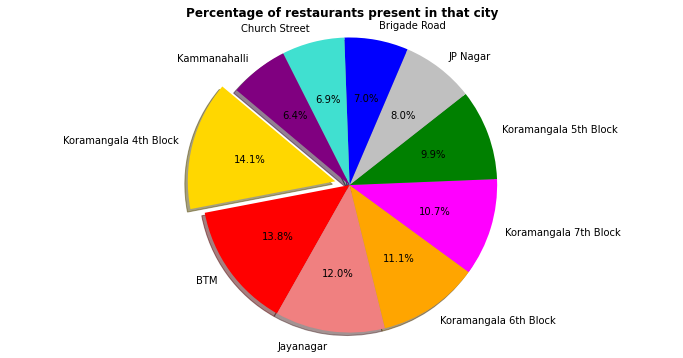

In [30]:
plt.figure(figsize = (12,6))
names = data['city'].value_counts()[:10].index
values = data['city'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'orange','fuchsia','green','silver','blue','turquoise','purple']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that city", weight = 'bold')
plt.show()

#### Observation
- We can say that Koramangala 4th Block location,is where most of restaurant are available

##### Top 10 Restaurant type

In [31]:
#remove the nulll values in rest_type
rest_type_data = data[data.rest_type.notnull()]
rest_type_data.isna().sum()

name                0
online_order        0
book_table          0
rating              0
phone             578
location            0
rest_type           0
dish_liked      13416
cuisines            0
average_cost      154
city                0
dtype: int64

In [32]:
# count each dish to see how many times each dish repeated
rest_count = []
for i in rest_type_data.rest_type:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        rest_count.append(t)

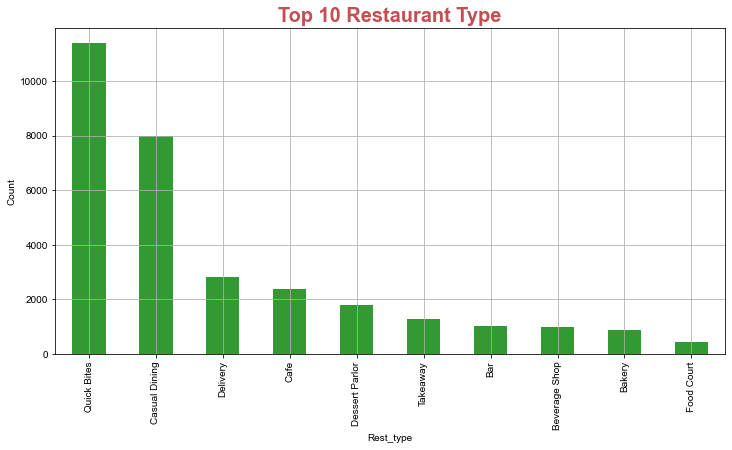

In [33]:
plt.figure(figsize=(12,6)) 
pd.Series(rest_count).value_counts()[:10].plot(kind='bar',color= 'green',alpha=0.8)
sns.set(style="ticks")
plt.title('Top 10 Restaurant Type',weight='bold',fontsize =20,color='r')
plt.xlabel('Rest_type')
plt.ylabel('Count')
plt.grid()

Observation
- We can say that rest_type Quick bites is most in Banglore.



###### Average cost in restaurants

In [34]:

data['average_cost'].value_counts()[:10]

300    3941
400    3920
500    2987
200    2477
600    2250
250    1637
800    1339
700    1183
150    1068
350     990
Name: average_cost, dtype: int64

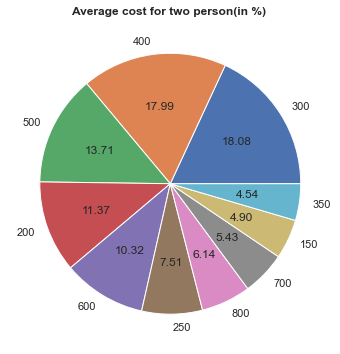

In [35]:


plt.figure(figsize=(12,6))
values = data.average_cost.value_counts()[:10]
labels = data['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()


Observation
- There is 18.08% percetage chances that for two person average cost will be 300 and 17.99% chance that cost will be 400. so on.

###### Top 10 Dish liked

In [36]:
#remove the nulll values in dish_liked
dishes_data = data[data.dish_liked.notnull()]
dishes_data.isna().sum()

name              0
online_order      0
book_table        0
rating            0
phone           210
location          0
rest_type        51
dish_liked        0
cuisines          0
average_cost     71
city              0
dtype: int64

In [37]:
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())
dishes_data.dish_liked

0        pasta, lunch buffet, masala papad, paneer laja...
1        momos, lunch buffet, chocolate nirvana, thai g...
2        churros, cannelloni, minestrone soup, hot choc...
3                                              masala dosa
4                                      panipuri, gol gappe
                               ...                        
51611                                         manchow soup
51617                               coffee, vada, mla dosa
51620    noodles, chicken noodle, momos, american chops...
51628    chicken quesadilla, naan, breakfast buffet, ch...
51677                                 biryani, andhra meal
Name: dish_liked, Length: 15659, dtype: object

In [38]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

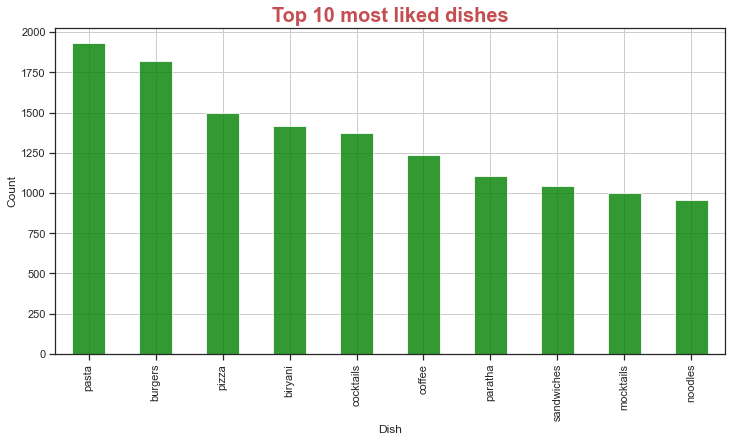

In [39]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'green',alpha=0.8)
sns.set(style="ticks")
plt.title('Top 10 most liked dishes',weight='bold',fontsize =20,color='r')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.grid()

Observation
- Pasta is the most liked dish followed by burgers

##### Top 10 restaurants serving Pasta

In [40]:
#restaurnts serving pasta
rest_pasta=dishes_data[dishes_data['dish_liked'].str.contains(u'pasta')]

In [41]:
rest_pasta.shape
#2310 restaurants serve pasta

(2310, 11)

In [42]:
#sorted the restaurant by rating which serves pasta
rest_pasta.sort_values("rating", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')

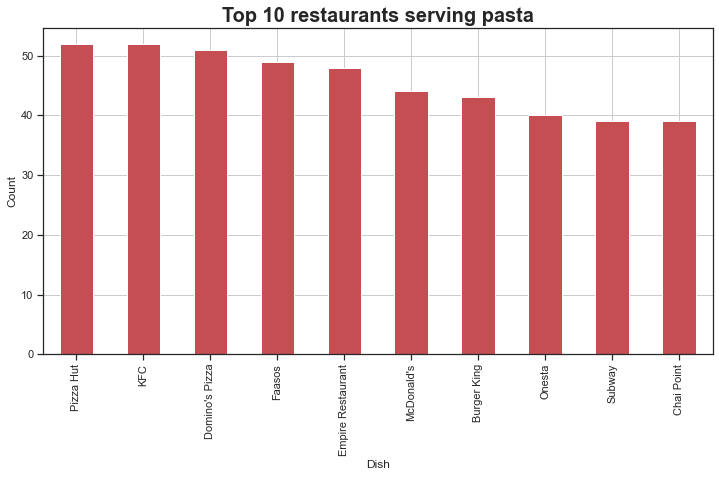

In [43]:
plt.figure(figsize=(12,6)) 
dishes_data['name'].value_counts()[:10].plot(kind='bar',color= 'r',alpha=1)
sns.set(style="ticks")
plt.title('Top 10 restaurants serving pasta',weight='bold',fontsize =20)
plt.xlabel('Dish')
plt.ylabel('Count')
plt.grid()

Observation:
- Pizza hut followed by KFC serves good Pasta

##### Top 10 Cuisines

In [44]:
data['cuisines'] = data['cuisines'].apply(lambda x:x.lower().strip())

In [45]:

cuisines_count= []

for i in data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)
        

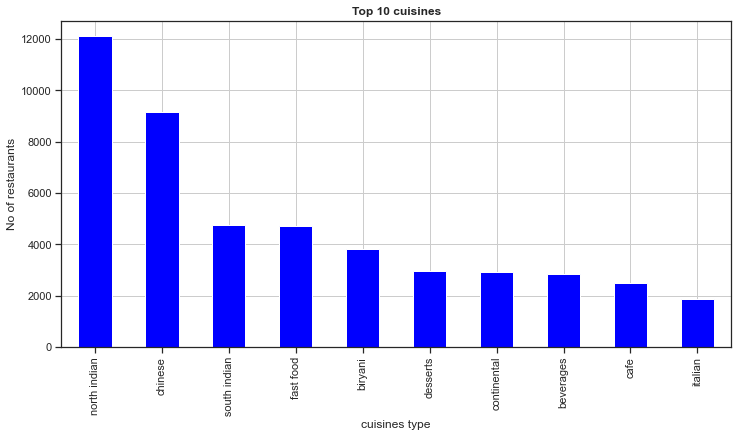

In [46]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'blue')
plt.title('Top 10 cuisines',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')
plt.grid()

Observation
- North Indian food is at top, followed by chinese and so on.

##### Average Rating of restaurants

3.675176793683471


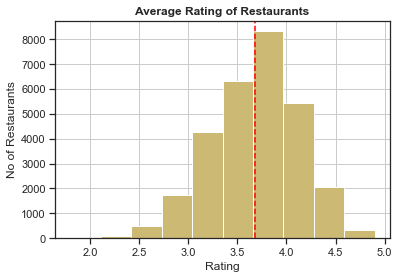

In [47]:
data.rating.hist(color='y')
plt.axvline(x= data.rating.mean(),ls='--',color='red')
plt.title('Average Rating of Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.rating.mean())

Observation

- Average rating is 3.6

#### Rating vs Online Order

Text(0.5, 1.0, 'rating vs oline order')

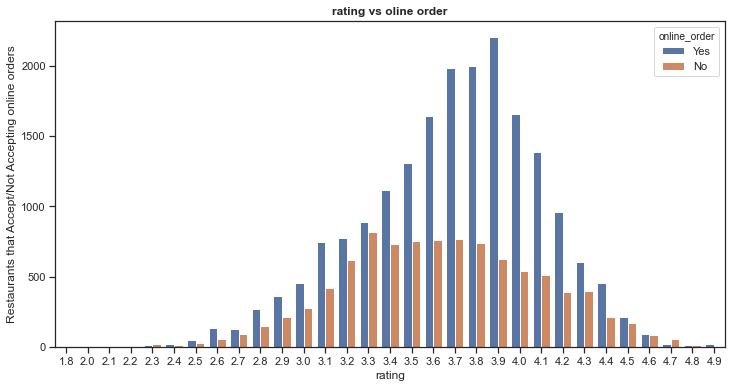

In [48]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rating'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rating vs oline order",weight = 'bold')

Observation:
- it is seen that reataurants accepting online order has comparatively good rating than the restaurant which doesn't.

## Preprocess for model building.

In [49]:
data.isnull().sum()

name                0
online_order        0
book_table          0
rating              0
phone             581
location            0
rest_type         106
dish_liked      13471
cuisines            0
average_cost      155
city                0
dtype: int64

In [50]:
#one hot encoding on "online_order" and "book_table"
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data.head(2)


,name,online_order,book_table,rating,phone,location,rest_type,dish_liked,cuisines,average_cost,city
0,Jalsa,1,1,4.1,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","north indian, mughlai, chinese",800,Banashankari
1,Spice Elephant,1,0,4.1,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","chinese, north indian, thai",800,Banashankari


#### Handling Phone numbers

In [51]:
def phone_num_count(phone_nums):
    '''
    counts the phone number from string and returns count
    example "+91 231231231\n +91312312312" returns 2
    the function returns 0 if missing
    '''
    phones_n = 0
    if phone_nums == '0' or phone_nums == 0 or type(phone_nums) == float:
        return 0
    length = 0
    for i in range(len(phone_nums)):
        try:
            if int(phone_nums[i]):
                length = length + 1
                if length == 8:
                    phones_n += 1
        except:
            length = 0
    return phones_n


In [52]:
#Function checks 8 continuos integers and increases the phone count by 1
#returns number of phone numbers and 0 for missing value
data['phone'] = data.apply(lambda x: phone_num_count(x.phone), axis=1)

In [53]:
data.isnull().sum()

name                0
online_order        0
book_table          0
rating              0
phone               0
location            0
rest_type         106
dish_liked      13471
cuisines            0
average_cost      155
city                0
dtype: int64

#### Handling average_cost

In [54]:
def str_to_float(cost):
    '''
    Retruns the float from the string cost for two
    example '1,700' returns 1700 
    '''
    
    if type(cost) == str:
        cost = cost.replace(",","").replace(" ","")
        return(float(cost))
    else:
        return np.nan

In [55]:
#function str_to_float replaces "," and " "-space and returns the float value of the cost. 
# returns np.nan for missing value
data['average_cost'] = data.apply(lambda x: str_to_float(x.average_cost), axis=1)

In [56]:
#removing rows which has null in rest_type 
data.drop(data[data['rest_type'].isnull()].index, inplace = True) 


In [57]:
data.isnull().sum()

name                0
online_order        0
book_table          0
rating              0
phone               0
location            0
rest_type           0
dish_liked      13416
cuisines            0
average_cost      154
city                0
dtype: int64

In [58]:
#dropping column name as it is not required for analysis
#also dropping columns "dish_liked" as it contains large amount of nulls
data.drop(columns=['name','dish_liked'], inplace  =True)

#### Heatmap

In [59]:
data.isnull().sum()

online_order      0
book_table        0
rating            0
phone             0
location          0
rest_type         0
cuisines          0
average_cost    154
city              0
dtype: int64

In [60]:
data.head(2)

,online_order,book_table,rating,phone,location,rest_type,cuisines,average_cost,city
0,1,1,4.1,2,Banashankari,Casual Dining,"north indian, mughlai, chinese",800.0,Banashankari
1,1,0,4.1,1,Banashankari,Casual Dining,"chinese, north indian, thai",800.0,Banashankari


In [61]:
df=data.drop(columns=['location','cuisines','rest_type','city'])
df.head(2)

,online_order,book_table,rating,phone,average_cost
0,1,1,4.1,2,800.0
1,1,0,4.1,1,800.0


In [62]:
#Filling missing values in average cost by KNN imputations

imputer = KNNImputer(n_neighbors=3)
data_imputed=imputer.fit_transform(df)

In [63]:
zomato_df = pd.DataFrame(data_imputed,
                              columns= df.columns,
                              index=data.index)

In [64]:
zomato_df.isnull().sum()

online_order    0
book_table      0
rating          0
phone           0
average_cost    0
dtype: int64

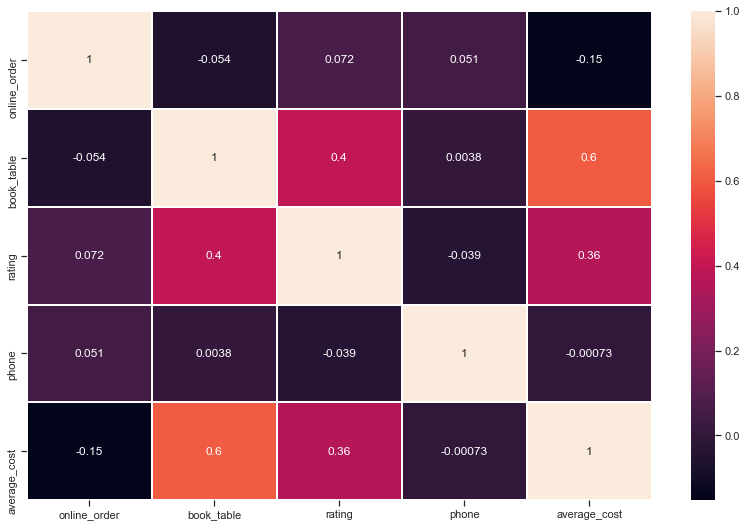

In [65]:
plt.figure(figsize=(14,9))
ax= sns.heatmap(zomato_df.corr(),annot=True,linewidth=1)
#ax.tick_params(size=10,color='w',labelsize=10,labelcolor='w')
plt.show()

Observation:
- we can see that average_cost and book_table have impact on rating

### handling multi valued collumns

In [66]:
def lower_(x):
    '''
    returns the lower case of string after removing all the space 
    example 'CAsual Dining' returns 'casualdining'
    '''
    if type(x) == str:
        return x.replace(" ","").lower()

In [67]:
#converting to lower case and replacing space with no space
data['rest_type'] = data.apply(lambda x: lower_(x.rest_type), axis=1)
data['cuisines'] = data.apply(lambda x: lower_(x.cuisines), axis=1)

In [68]:
data.head(5)

,online_order,book_table,rating,phone,location,rest_type,cuisines,average_cost,city
0,1,1,4.1,2,Banashankari,casualdining,"northindian,mughlai,chinese",800.0,Banashankari
1,1,0,4.1,1,Banashankari,casualdining,"chinese,northindian,thai",800.0,Banashankari
2,1,0,3.8,1,Banashankari,"cafe,casualdining","cafe,mexican,italian",800.0,Banashankari
3,0,0,3.7,0,Banashankari,quickbites,"southindian,northindian",300.0,Banashankari
4,0,0,3.8,1,Basavanagudi,casualdining,"northindian,rajasthani",600.0,Banashankari


In [69]:
#dropping column city as we have similar data in location
data.drop(columns=['city'],inplace=True)

In [70]:
data.head(5)
columns= data.columns
columns

Index(['online_order', 'book_table', 'rating', 'phone', 'location',
       'rest_type', 'cuisines', 'average_cost'],
      dtype='object')

In [71]:
#this fuction will search the parttern of multivalued columns and spit it accordingly
import re
def split_ (col, regExp):
    
    if re.search(regExp, col) is not None:
        return 1
    else: 
        return 0





In [72]:
#spliting cusisines
def split_cusines(data,column,regex):
    for col,re in zip(column,regex):
       data[col] = data.apply(lambda x: split_(x.cuisines,re), axis=1)
    
    
    
    

In [73]:
#spliting rest_type
def split_rest(data,column,regex):
    for col,re in zip(column,regex):
       data[col] = data.apply(lambda x: split_(x.rest_type,re), axis=1)
    
    
    

In [74]:
#collumn names for cusines
cuisines_type_col=('north_indian','mughalai_dish','chinese_food','thai',
                   'fast_food','mexican','italian','southindian','rajasthani',
                   'andhra','continental','european','drinks','american','bakery','desserts',
                   'biryani','asian','korean','indonesian','japnis','goan','seafood','steak',
                   'iranian','mangalorean','vietnamese','hyderabadi','bengali','arabian',
                   'bbq_chicken','afghani','lebanese','fingerfood','tibetan','middleeastern',
                   'mediterranean','kerala','oriya','african','modernindian','nepalese','maharashtrian',
                   'gujarati','tamil','turkish','afghan','lucknowi','australian','malaysian','burmese',
                   'portuguese','parsi','greek','barfood','awadhi','naga','kashmiri','assamese',
                   'srilankan','mongolian','british','german','paan','russian','jewish','vegan',
                   'rawmeats','sindhi','healthy_food')

#tuple of  diff restaurants
cuisines_type_str=('northindian|northeastern|bihari','mughlai|bohri|kebab','chinese|momos|cantonese|singaporean','thai','cafe|fastfood|sandwich|hotdogs|streetfood|rolls|belgian|wraps',
                   'mexican|tex-mex','italian|pizza','southindian','rajasthani','andhra','continental|spanish|french','european',
                   'bubbletea|tea|coffee|drinksonly|juices|beverages','american|southamerican','bakery','icecream|desserts|mithai','biryani',
                   'asian|panasian','korean','indonesian','japanese|sushi','goan','seafood','steak','iranian','mangalorean',
                   'vietnamese','hyderabadi','bengali','arabian','bbq|charcoalchicken|roastchicken|grill','afghani','lebanese','fingerfood','tibetan','middleeastern','mediterranean',
                   'kerala','oriya','african','modernindian','nepalese','maharashtrian|konkan','tamil|chettinad','gujarati','turkish','afghan','lucknowi','australian','malaysian',
                   'burmese','portuguese','parsi','greek','barfood','awadhi','naga','kashmiri','assamese','srilankan','mongolian','british','german','paan','russian',
                   'jewish','vegan','rawmeats','sindhi','healthyfood|salad')



In [75]:
split_cusines(data,cuisines_type_col,cuisines_type_str)

In [76]:
data.tail(3)

,online_order,book_table,rating,phone,location,rest_type,cuisines,average_cost,north_indian,mughalai_dish,...,mongolian,british,german,paan,russian,jewish,vegan,rawmeats,sindhi,healthy_food
51637,0,0,3.3,1,Brookefield,beverageshop,beverages,300.0,0,0,...,0,0,0,0,0,0,0,0,0,0
51641,0,0,3.2,0,Brookefield,quickbites,"andhra,chinese,southindian",NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
51677,0,0,2.5,1,Whitefield,"casualdining,bar","andhra,southindian,chinese,northindian",800.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#collumn names for rest_type
rest_type_col= ('dining','dhaba','food_outlets','bakery','sweetshop','cafe','quickbites','dessertparlor','mess','clubs',
             'beverageshop','delivery','takeaway','popup','meatshop')
#tuple of  diff rest_type
rest_type_str =('casualdining|finedining','dhaba','foodtruck|foodcourt|kiosk','bakery','sweetshop|confectionery',
                'cafe|iranicafee','quickbites','dessertparlor','bhojanalya|mess','lounge|club|bar|pub','beverageshop',
                'delivery','takeaway','popup','meatshop')


In [78]:
split_rest(data,rest_type_col,rest_type_str)

In [79]:
data.head(3)

,online_order,book_table,rating,phone,location,rest_type,cuisines,average_cost,north_indian,mughalai_dish,...,cafe,quickbites,dessertparlor,mess,clubs,beverageshop,delivery,takeaway,popup,meatshop
0,1,1,4.1,2,Banashankari,casualdining,"northindian,mughlai,chinese",800.0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,1,Banashankari,casualdining,"chinese,northindian,thai",800.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,1,Banashankari,"cafe,casualdining","cafe,mexican,italian",800.0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [80]:
#droping columns'rest_type' and 'cuisines'
data.drop(columns=['rest_type','cuisines'], inplace  =True)


In [81]:
#One-hot encoding on location
data_df1 = pd.get_dummies(data, drop_first=True)

In [82]:
data_df1.columns

Index(['online_order', 'book_table', 'rating', 'phone', 'average_cost',
       'north_indian', 'mughalai_dish', 'chinese_food', 'thai', 'fast_food',
       ...
       'location_Ulsoor', 'location_Uttarahalli',
       'location_Varthur Main Road, Whitefield', 'location_Vasanth Nagar',
       'location_Vijay Nagar', 'location_West Bangalore',
       'location_Whitefield', 'location_Wilson Garden', 'location_Yelahanka',
       'location_Yeshwantpur'],
      dtype='object', length=180)

### Handling missing values

In [83]:
data_df1['average_cost'].isna().sum()

154

In [84]:
#Filling missing values in average cost by KNN imputations
imputer = KNNImputer(n_neighbors=3)
data_imputed=imputer.fit_transform(data_df1)

In [85]:
zomato_df = pd.DataFrame(data_imputed,
                              columns= data_df1.columns,
                              index=data.index)

In [86]:
zomato_df.isnull().sum().sum()

0

In [87]:
zomato_df.head()

,online_order,book_table,rating,phone,average_cost,north_indian,mughalai_dish,chinese_food,thai,fast_food,...,location_Ulsoor,location_Uttarahalli,"location_Varthur Main Road, Whitefield",location_Vasanth Nagar,location_Vijay Nagar,location_West Bangalore,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur
0,1.0,1.0,4.1,2.0,800.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,4.1,1.0,800.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,3.8,1.0,800.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.7,0.0,300.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.8,1.0,600.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
#shape of preprocessed dataset
data_df1.shape

(29024, 180)

###### build X & y dataset

In [89]:
X = zomato_df.drop(columns=['rating'])
y = zomato_df.iloc[:,2]


In [90]:
X.shape

(29024, 179)

#### Train test split

In [91]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2021)


### Model Buliding

In [92]:
r2score= []
algo= []
tune=[]

### Linear Regression

In [93]:
regressor = LinearRegression()

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
r2score.append(r2_score(y_test, y_pred))
algo.append("linear_reg")
tune.append("without")
print("r2 score: ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred) )



r2 score:  0.3299737655132876
MSE :  0.1283790487099604


In [94]:
#liner regression using cross validation
regressor = LinearRegression()

kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
results = cross_val_score(regressor, X, y, cv=kfold, 
                          scoring='r2')
R2 = results
print(R2)
print("R-Squared: %.2f" % (R2.mean()))
r2score.append(R2.mean())
algo.append("linear_reg")
tune.append("with")

[0.32857244 0.31616622 0.32689985 0.31896078 0.2998541 ]
R-Squared: 0.32


## Decision tree

In [95]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state=2020)
clf2 = clf.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("r2 score: ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred) )

algo.append("decision_tree")
tune.append("without")
r2score.append(r2_score(y_test, y_pred))


r2 score:  0.7289471360191726
MSE :  0.051934546793718124


In [96]:
#tuning Descision tree
depth_range = np.linspace(10,1000,10)

parameters = dict(max_depth=depth_range)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)

clf = DecisionTreeRegressor(random_state=2020)
cv = RandomizedSearchCV(clf, param_distributions=parameters,
                  cv=kfold,scoring='r2',n_iter=20)
cv.fit(X,y)
# Best Parameters
print(cv.best_params_)
print(cv.best_score_)
cv.best_estimator_
algo.append("decision_tree")
tune.append("with")
r2score.append(cv.best_score_)

{'max_depth': 120.0}
0.7637340621733845


## Random Forest Regressor

In [97]:
#Random Forest
model_rf = RandomForestRegressor(random_state=2021)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("r2 score: ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred))
algo.append("Random_Forest")
tune.append("without")
r2score.append(r2_score(y_test, y_pred))

r2 score:  0.7953052907093271
MSE :  0.039220124081902084


In [98]:
#hyper paramerter tuning for Random Forest

scores= ["r2","neg_mean_squared_error"]
n_est_range = [100,200,300,350,400,500]

parameters = {'n_estimators':n_est_range,
            'max_features': np.arange(10,30)
             }
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
model_rf = RandomForestRegressor(random_state=2021)

cv = RandomizedSearchCV(model_rf, param_distributions=parameters,cv=kfold,scoring='r2',n_iter=20)
cv.fit( X, y )
results_df = pd.DataFrame(cv.cv_results_  )
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)

algo.append("Random_Forest")
tune.append("with")
r2score.append(cv.best_score_)   



{'n_estimators': 500, 'max_features': 13}
0.8305333204546171
RandomForestRegressor(max_features=13, n_estimators=500, random_state=2021)


## XGBoost

In [99]:
#XGBoost
from xgboost import XGBRegressor
clf = XGBRegressor(random_state=2021)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("r2 score: ",r2_score(y_test, y_pred))
print("MSE : ",mean_squared_error(y_test, y_pred))

algo.append("XGBoost")
tune.append("without")
r2score.append(r2_score(y_test, y_pred))  

[08:29:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score:  0.3470854877922186
MSE :  0.12510039107703788


In [100]:
#xgboost tuning
lr_range = [0.1, 0.2,0.25, 0.3]
n_est_range = [10,20,30,50,100]
md_range = [8,10,15,20]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=md_range)

xg = XGBRegressor(random_state=2021,silent = True)
cv = RandomizedSearchCV(xg, param_distributions=parameters,
                  cv=kfold,scoring='r2',n_iter=20,verbose=1)



cv.fit(X,y)

print(cv.best_params_)

print(cv.best_score_)

algo.append("XGBoost")
tune.append("with")
r2score.append(cv.best_score_) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 23.0min finished


{'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.25}
0.7766728858142665


In [101]:
r2plot = pd.DataFrame({'algo': algo, 'tune': tune, 'r2score':r2score})
r2plot

,algo,tune,r2score
0,linear_reg,without,0.329974
1,linear_reg,with,0.318091
2,decision_tree,without,0.728947
3,decision_tree,with,0.763734
4,Random_Forest,without,0.795305
5,Random_Forest,with,0.830533
6,XGBoost,without,0.347085
7,XGBoost,with,0.776673


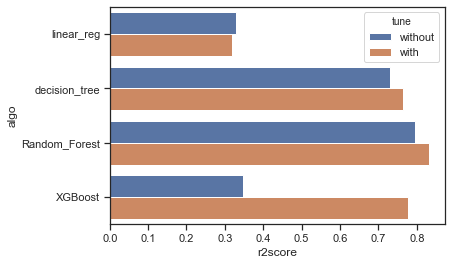

In [102]:
sns.barplot(data=r2plot, x='r2score', hue='tune', y='algo')

Observation:
- Without any tuning Random forest is givng r2 score as 0.79 and MSE as 0.03
- So went ahead and tuned random forest and it is giving  r2score: 0.83

## Testing

In [103]:
#Random Forest
model_rf = RandomForestRegressor(max_features=20, n_estimators=350, random_state=2021)
model_rf.fit( X_train , y_train )
y_pred = model_rf.predict(X_test)



In [104]:
#saving the model
import pickle
filename='model_save'
pickle.dump(model_rf,open(filename,'wb'))


In [105]:
model=pickle.load(open('model_save','rb'))

###### Testing on Dummy Data

In [106]:
#list of cities
#as we have performed one hot encoding on train data for testing even we need that amout of columns
locations_col=('location_Banashankari', 'location_Banaswadi','location_Bannerghatta Road', 'location_Basavanagudi','location_Basaveshwara Nagar', 'location_Bellandur',
       'location_Bommanahalli', 'location_Brigade Road','location_Brookefield', 'location_CV Raman Nagar','location_Central Bangalore', 'location_Church Street',
       'location_City Market', 'location_Commercial Street','location_Cunningham Road', 'location_Domlur','location_East Bangalore', 'location_Ejipura',
       'location_Electronic City', 'location_Frazer Town','location_HBR Layout', 'location_HSR', 'location_Hebbal','location_Hennur', 'location_Hosur Road','location_ITPL Main Road, Whitefield', 'location_Indiranagar',
       'location_Infantry Road', 'location_JP Nagar', 'location_Jalahalli','location_Jayanagar', 'location_Jeevan Bhima Nagar','location_KR Puram', 'location_Kaggadasapura', 'location_Kalyan Nagar',
       'location_Kammanahalli', 'location_Kanakapura Road', 'location_Kengeri','location_Koramangala', 'location_Koramangala 1st Block','location_Koramangala 2nd Block', 'location_Koramangala 3rd Block',
       'location_Koramangala 4th Block', 'location_Koramangala 5th Block','location_Koramangala 6th Block', 'location_Koramangala 7th Block',
       'location_Koramangala 8th Block', 'location_Kumaraswamy Layout','location_Langford Town', 'location_Lavelle Road', 'location_MG Road',
       'location_Magadi Road', 'location_Majestic', 'location_Malleshwaram','location_Marathahalli', 'location_Mysore Road', 'location_Nagarbhavi',
       'location_Nagawara', 'location_New BEL Road','location_North Bangalore', 'location_Old Airport Road','location_Old Madras Road', 'location_Peenya', 'location_RT Nagar',
       'location_Race Course Road', 'location_Rajajinagar','location_Rajarajeshwari Nagar', 'location_Rammurthy Nagar','location_Residency Road', 'location_Richmond Road',
       'location_Sadashiv Nagar', 'location_Sahakara Nagar','location_Sanjay Nagar', 'location_Sankey Road','location_Sarjapur Road', 'location_Seshadripuram',
       'location_Shanti Nagar', 'location_Shivajinagar','location_South Bangalore', 'location_St. Marks Road','location_Thippasandra', 'location_Ulsoor', 'location_Uttarahalli',
       'location_Varthur Main Road, Whitefield', 'location_Vasanth Nagar','location_Vijay Nagar', 'location_West Bangalore',
       'location_Whitefield', 'location_Wilson Garden', 'location_Yelahanka','location_Yeshwantpur')




In [107]:
#function to one hot encode locations data
def split_location(data,column):
    for col in column:
       data[col] = data.apply(lambda x: split_(x.location,col), axis=1)
    

In [108]:
testing= [1,1,2,800,"northindian,mughlai,chinese","casualdining","Banashankari"]


In [109]:
test_data=pd.DataFrame([testing],columns=['online_order', 'book_table', 'phone','average_cost','cuisines','rest_type','location'])

In [110]:
#converting to lower case and replacing space with no space
test_data['rest_type'] = test_data.apply(lambda x: lower_(x.rest_type), axis=1)
test_data['cuisines'] = test_data.apply(lambda x: lower_(x.cuisines), axis=1)
split_cusines(test_data,cuisines_type_col,cuisines_type_str)
split_rest(test_data,rest_type_col,rest_type_str)
split_location(test_data,locations_col)


In [111]:
#droping columns'rest_type' and 'cuisines'
test_data.drop(columns=['rest_type','cuisines','location'], inplace  =True)


In [112]:
test_data.shape

(1, 179)

In [113]:
r=model.predict(test_data)

In [114]:
print("rating is : ",round(r[0],2))

rating is :  3.98


### Predecting the rating of  New Restaurants

In [115]:
#displaying restaurants where rating is NEW
new_rest.head(3)

,name,online_order,book_table,rating,phone,location,rest_type,dish_liked,cuisines,average_cost,city
72,Spicy Tandoor,No,No,NEW,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,Banashankari
75,Om Sri Vinayaka Chats,No,No,NEW,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,Banashankari
110,Hari Super Sandwich,No,No,NEW,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,Banashankari


#### Pre-Processing on the Testing Data

In [116]:
#one hot encoding on "online_order" and "book_table"
new_rest['online_order']= pd.get_dummies(new_rest.online_order, drop_first=True)
new_rest['book_table']= pd.get_dummies(new_rest.book_table, drop_first=True)


In [117]:
#pre procssing phone and avg cost
new_rest['phone'] = new_rest.apply(lambda x: phone_num_count(str(x.phone)), axis=1)
new_rest['average_cost'] = new_rest.apply(lambda x: str_to_float(x.average_cost), axis=1)

In [118]:
new_rest.drop(columns=['dish_liked','rating','city'], inplace  =True)


In [119]:
#droping rows which has null 
new_rest.dropna(axis=0,how="any",inplace=True)
new_rest.isnull().sum()

name            0
online_order    0
book_table      0
phone           0
location        0
rest_type       0
cuisines        0
average_cost    0
dtype: int64

In [120]:
#converting to lower case and replacing space with no space
new_rest['rest_type'] = new_rest.apply(lambda x: lower_(x.rest_type), axis=1)
new_rest['cuisines'] = new_rest.apply(lambda x: lower_(x.cuisines), axis=1)


In [121]:
#splitting of multivalued columns
split_cusines(new_rest,cuisines_type_col,cuisines_type_str)
split_rest(new_rest,rest_type_col,rest_type_str)
split_location(new_rest,locations_col)


In [122]:
#storing names of restaurants for further use
names= new_rest['name']


In [123]:
#droping columns'rest_type', 'cuisines','location'
new_rest.drop(columns=['name','rest_type','cuisines','location'], inplace  =True)


In [124]:
new_rest.shape

(1605, 179)

In [125]:
#pre-processesd data
new_rest.head(3)

,online_order,book_table,phone,average_cost,north_indian,mughalai_dish,chinese_food,thai,fast_food,mexican,...,location_Ulsoor,location_Uttarahalli,"location_Varthur Main Road, Whitefield",location_Vasanth Nagar,location_Vijay Nagar,location_West Bangalore,location_Whitefield,location_Wilson Garden,location_Yelahanka,location_Yeshwantpur
72,0,0,1,150.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,1,500.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
110,0,0,1,200.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
#predections on test data
r=model.predict(new_rest)
print("rating is : ",r)

rating is :  [3.40008904 3.47395238 3.37551905 ... 3.57084308 3.51662143 3.28870828]


In [127]:
for name,rating in zip(names,r):
    print(name.ljust(50), "Predicted Rating : ",round(rating,1))

Spicy Tandoor                                      Predicted Rating :  3.4
Om Sri Vinayaka Chats                              Predicted Rating :  3.5
Hari Super Sandwich                                Predicted Rating :  3.4
Roll Magic Fast Food                               Predicted Rating :  3.4
Foodlieious Multi Cuisine                          Predicted Rating :  3.3
Thanishka Nati And Karavali Style                  Predicted Rating :  3.4
Melting Melodies                                   Predicted Rating :  3.5
New Indraprasta                                    Predicted Rating :  3.4
Bitez                                              Predicted Rating :  3.5
SSV Upahar                                         Predicted Rating :  3.6
Sai Super Sandwich                                 Predicted Rating :  3.5
Right Pizza                                        Predicted Rating :  3.5
The Sip Shop                                       Predicted Rating :  3.7
Sri Banashankari Upahara 

Chefie                                             Predicted Rating :  3.5
Tasty Homely Food                                  Predicted Rating :  3.6
Paratha Mania                                      Predicted Rating :  3.3
Sardar Tikka Singh                                 Predicted Rating :  3.5
House Of Combos                                    Predicted Rating :  3.4
Andhra Ghumaghumalu                                Predicted Rating :  3.6
Kheer Kadamb - Bengali Sweets and Snacks           Predicted Rating :  3.6
Raj Sweets                                         Predicted Rating :  3.5
Ice Crystal Gola                                   Predicted Rating :  3.9
Amadora Gourmet Ice Cream & Sorbet                 Predicted Rating :  3.8
Magic scoops N Smiles                              Predicted Rating :  3.8
Parvas Biriyani Park                               Predicted Rating :  3.3
Toscano Wine Connection                            Predicted Rating :  4.0
Suvai Factory            

Peter's Food Junction                              Predicted Rating :  3.8
Nagli Veg & Non Veg                                Predicted Rating :  3.4
Chit Chat Cafe                                     Predicted Rating :  3.3
Inntense Restobar                                  Predicted Rating :  4.2
Fusion Theory                                      Predicted Rating :  3.8
Crave Bit Cafe                                     Predicted Rating :  3.7
Cafe Terra                                         Predicted Rating :  3.9
Chaai Resto                                        Predicted Rating :  3.8
Shivaay's Cafe                                     Predicted Rating :  3.8
Ice Burg                                           Predicted Rating :  3.6
Biryanis And More                                  Predicted Rating :  3.5
Le Arabia                                          Predicted Rating :  3.8
Cake Chemistry                                     Predicted Rating :  3.5
Momo Blues               

Caramel Shake                                      Predicted Rating :  3.7
My Tea House                                       Predicted Rating :  4.0
The Chai Stop                                      Predicted Rating :  3.5
Al-Marhaba Restaurant                              Predicted Rating :  3.5
Biryani Rooh-e-Khaas                               Predicted Rating :  3.3
Tasty Kitchens                                     Predicted Rating :  3.5
Tiffin Box                                         Predicted Rating :  3.5
Happy Eats                                         Predicted Rating :  3.6
Nutri Fit                                          Predicted Rating :  2.9
Fogg                                               Predicted Rating :  4.1
Punjabi Unplugged                                  Predicted Rating :  3.6
Desi Aahar                                         Predicted Rating :  3.3
Cheers Pub Bar & Restro                            Predicted Rating :  4.1
Pan Asian                

The Parrot House                                   Predicted Rating :  3.5
Wow Tiffin Food                                    Predicted Rating :  3.5
The Rice Company                                   Predicted Rating :  3.3
La-Pizza                                           Predicted Rating :  3.7
Chinese Food Point                                 Predicted Rating :  3.7
Paratha Mania                                      Predicted Rating :  3.3
Choice of Food                                     Predicted Rating :  3.6
Shiv sagar                                         Predicted Rating :  3.5
Nawab Di Biryani                                   Predicted Rating :  3.4
LocalHost                                          Predicted Rating :  3.5
Ind Foodies                                        Predicted Rating :  3.3
Shakes365                                          Predicted Rating :  3.7
Baskin Robbins                                     Predicted Rating :  3.8
Magic scoops N Smiles    